In [1]:
#unit 4 (nlp) nathural lanaguage processing
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\atmiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
#Applying the sentence tokenization on the text
from nltk.tokenize import sent_tokenize
text = "i love nlp.it's fun,isn't it?"
tokenize_sentance = sent_tokenize(text)
print(tokenize_sentance)

["i love nlp.it's fun,isn't it?"]


In [1]:
#punctuation word tokenize on the text
from nltk.tokenize import wordpunct_tokenize

text = "I love NLP.It's fun.isn't it?"
tokenised_wordpunch = wordpunct_tokenize(text)
print("word punctuation tokenizer",tokenised_wordpunch)


word punctuation tokenizer ['I', 'love', 'NLP', '.', 'It', "'", 's', 'fun', '.', 'isn', "'", 't', 'it', '?']


In [2]:
#steming all 3
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

porter =PorterStemmer()
snowball = SnowballStemmer("english")
lan = LancasterStemmer()

words = ["student","playing","played","studies","happiness"]

print("porter stemmer")
for w in words:
    print(w,"-->",porter.stem(w))
    
print("snowball stemmer")
for w in words:
    print(w,"-->",snowball.stem(w))
    
print("Lancaster stemmer")
for w in words:
    print(w,"-->",lan.stem(w))

porter stemmer
student --> student
playing --> play
played --> play
studies --> studi
happiness --> happi
snowball stemmer
student --> student
playing --> play
played --> play
studies --> studi
happiness --> happi
Lancaster stemmer
student --> stud
playing --> play
played --> play
studies --> study
happiness --> happy


In [5]:
#Lemmatization
#pip install stanza

import stanza
stanza.download("en")
nlp = stanza.Pipeline(lang='en',processors='tokenize,mwt,pos,lemma')

text = "The children are learning with their toys and games are ongoing"
doc = nlp(text)
for s in doc.sentences:
    for word in s.words:
        print(word.text,"-->",word.lemma)

2025-09-03 13:12:18 INFO: Downloaded file to C:\Users\atmiya\stanza_resources\resources.json
2025-09-03 13:12:18 INFO: Downloading default packages for language: en (English) ...
2025-09-03 13:12:19 INFO: File exists: C:\Users\atmiya\stanza_resources\en\default.zip
2025-09-03 13:12:23 INFO: Finished downloading models and saved to C:\Users\atmiya\stanza_resources
2025-09-03 13:12:23 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-09-03 13:12:23 INFO: Downloaded file to C:\Users\atmiya\stanza_resources\resources.json
2025-09-03 13:12:24 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-09-03 13:12:24 INFO: Using device: cpu
2025-09-03 13:12:24 INFO: Loading: tokenize
2025-09-03 13:12:24 INFO: Loading: mwt
2025-09-03 13:12:24 INFO: Loading: pos
2025-09-03 13:12:26 INFO: Loading: lemma
2025-09-03 13:12:26 INFO: Done loading processors!


The --> the
children --> child
are --> be
learning --> learn
with --> with
their --> their
toys --> toy
and --> and
games --> game
are --> be
ongoing --> ongoing


In [6]:
#sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atmiya\AppData\Roaming\nltk_data...


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentences = {
    "i like this product! It's amazinjg",
    "this is the worst experience ever",
    "The product is okay,not great but not bad either."
}
for text in sentences:
    score = analyzer.polarity_scores(text)
    print(text,'-->',score)

i like this product! It's amazinjg --> {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.4199}
this is the worst experience ever --> {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}
The product is okay,not great but not bad either. --> {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.745}


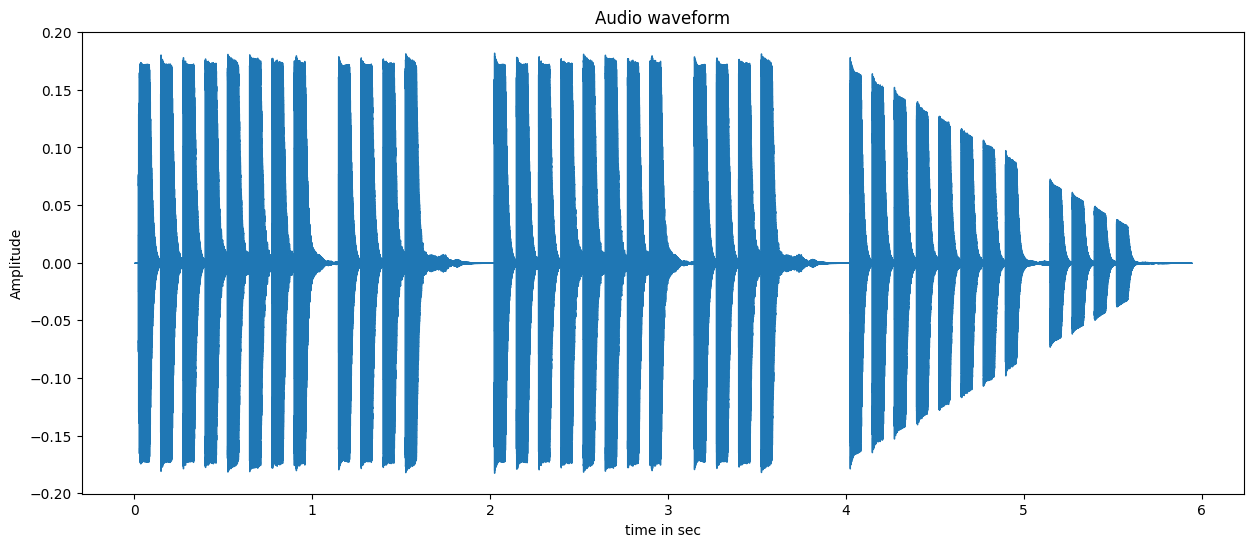

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt 

audio_files = 'sample.wav'
y,sr = librosa.load(audio_files)

plt.figure(figsize=(15,6))
librosa.display.waveshow(y,sr=sr)
plt.title('Audio waveform')
plt.xlabel('time in sec')
plt.ylabel('Amplitude')
plt.show()

In [3]:
#create a music artificially using ai 
#pip isntall sounddevice
import numpy as np 
import sounddevice as sd

sr = 44100
duration = 2.0
freqs = 440

t=np.linspace(0,duration,int(sr*duration),endpoint=False)
y = 0.5 * np.sin(2*np.pi*freqs*t)

sd.play(y,sr)
sd.wait()
